# Instructions for running Framework

-> 1. install requirements

-> 2. implementing mlflow (on localhost)

-> 3. implementing prefect

In [6]:
#set cwd to /{{ cookiecutter.repo_name }}
%cd .. 
%cd ..

C:\Users\Tom\Desktop\MA\{{ cookiecutter.repo_name }}\notebooks
C:\Users\Tom\Desktop\MA\{{ cookiecutter.repo_name }}


## 1. install requirements

In [6]:
!conda env create -f environment.yml


CondaValueError: prefix already exists: C:\Users\Tom\anaconda3\envs\MA



## 2. implementing mlflow (on localhost)

In [9]:
#set cwd to folder models (there will be mlflow metrics/params saved)
%cd models

C:\Users\Tom\Desktop\MA\{{ cookiecutter.repo_name }}\models


In [10]:
#start mlflow (dir has to pretend saved metrics and mlruns folder, otherwise new (empty) mlruns folder will created)
!mlflow ui

^C


-> now you cann see mlflow ui on http://localhost:5000
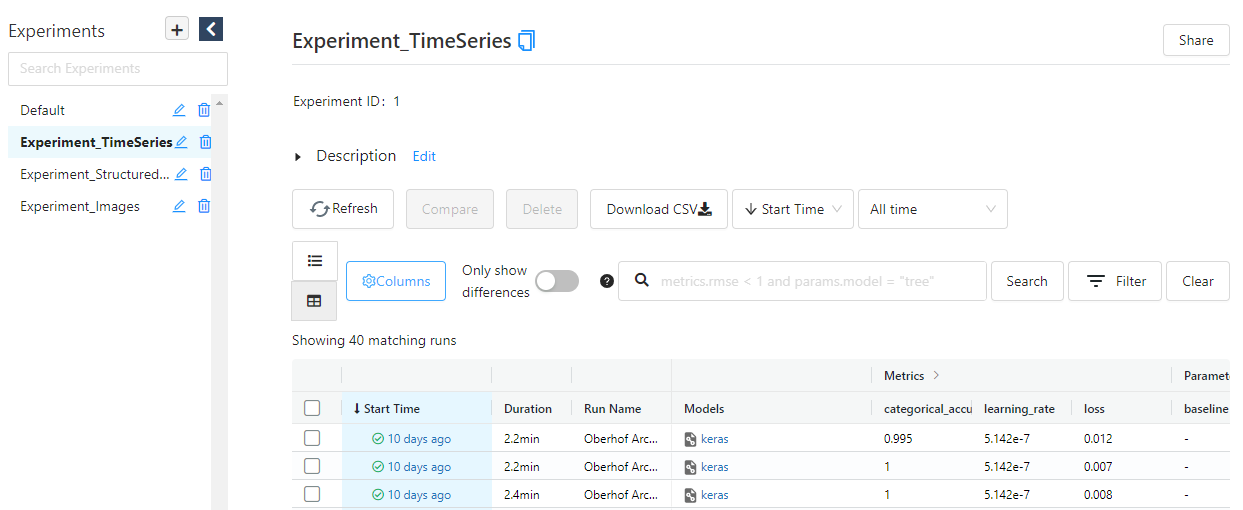

-> if you click e.g. on StartTime "10 days ago" you open the exeperiment and got access to params/diagrams
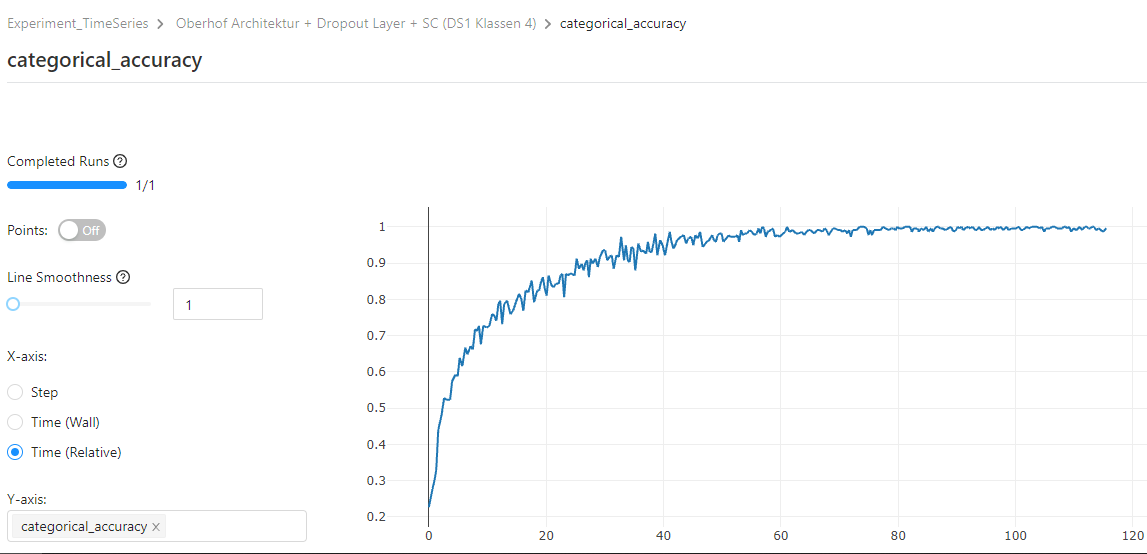

## 3. implementing prefect

#### 3.1 install docker desktop and WSL2  (pre requirements)
#### 3.2 start docker desktop (pre requirements)
#### 3.3 set backend server
#### 3.4 start prefect server
#### 3.5 register flow
#### 3.6 run flow without prefect server (dont recommended, just for testing flows)
#### 3.7 run flow (WITH prefect server and agent)

In [1]:
#3.3 set backend to server
!prefect backend server

Backend switched to server


In [2]:
#3.4 start prefect server 
!prefect server start

^C


-> now you can see prefect ui on http://localhost:8080
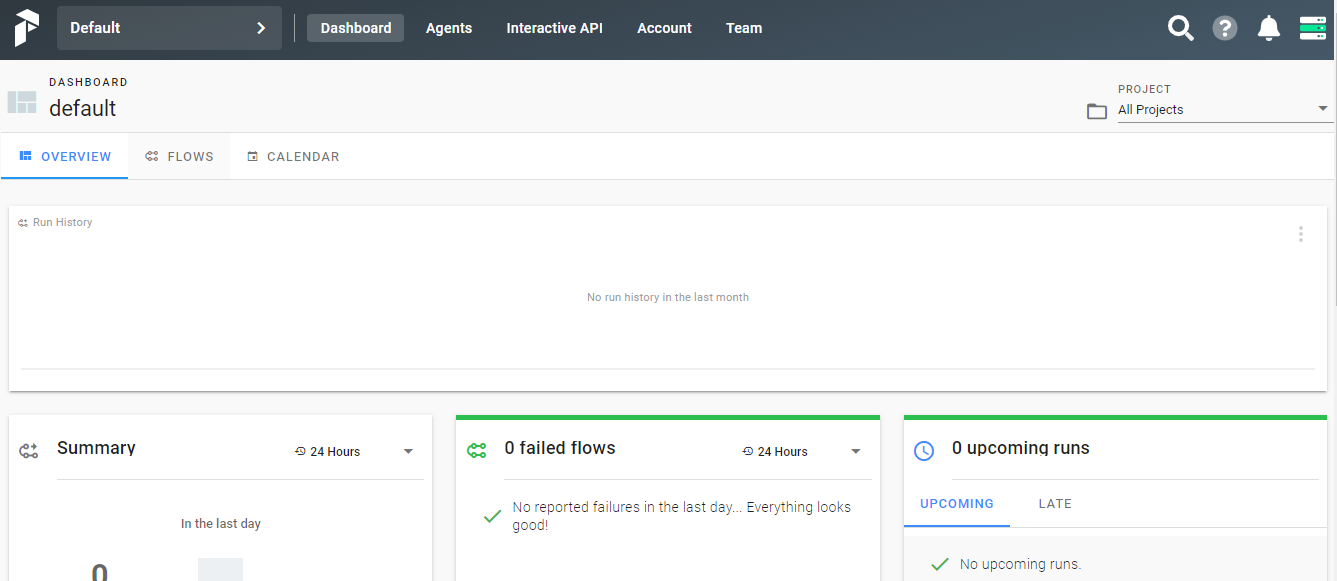

#### 3.5 register flow

In [10]:
#now let´s add declared flows to prefect server (see in main.py which flows will be registred)
!python main.py

#it just fails the outprint, because prefect outputs  └── , which jupyter cant handle (see img below))
#you need to run this command in vsc! 

Flow URL: http://localhost:8080/default/flow/a22f1a09-7927-45e1-8917-6f0e8fd74634


Error executing job with overrides: []

Traceback (most recent call last):
  File "C:\Users\Tom\Desktop\MA\{{ cookiecutter.repo_name }}\src\model\main.py", line 28, in timeseries_task
    flow.register(project_name=cfg.prefect.project_name) #register flow in ProjectName
  File "C:\Users\Tom\anaconda3\envs\MA\lib\site-packages\prefect\core\flow.py", line 1708, in register
    registered_flow = client.register(
  File "C:\Users\Tom\anaconda3\envs\MA\lib\site-packages\prefect\client\client.py", line 979, in register
    print(msg)
  File "C:\Users\Tom\anaconda3\envs\MA\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 1-3: character maps to <undefined>

Set the environment variable HYDRA_FULL_ERROR=1 for a complete stack trace.


-> jupyter notebook cant display  └──  └──  └── 

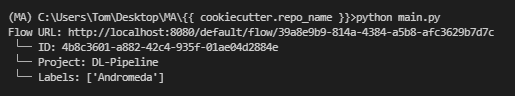

-> after running "!python main.py" in VSC, flows should be updated in Prefect UI

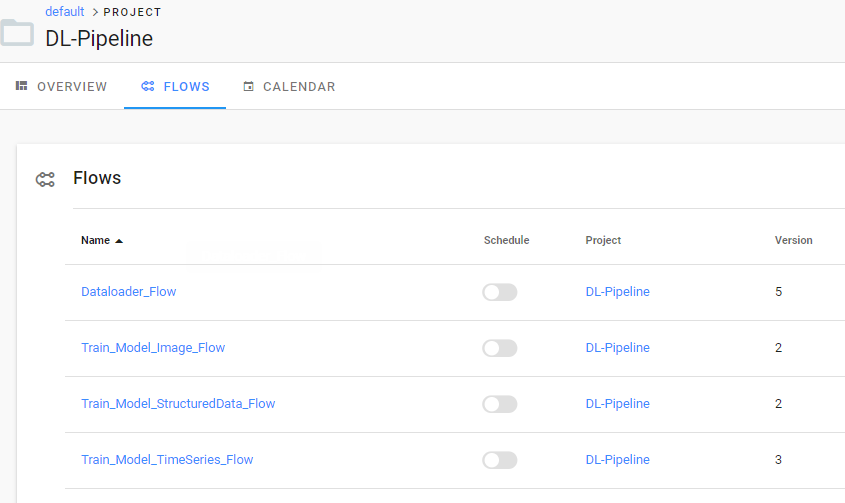

#### 3.6 run flow without prefect server (dont recommended, just for testing flows)

-> if you want to run immediately WITHOUT prefect agent, comment in last line in "src/dataloader/main.py" or "src/preprocess/main.py" or "src/model/main.py"

-> Code in main.py:  
Client().create_project(project_name=cfg.prefect.project_name)  
flow.register(project_name=cfg.prefect.project_name)   
flow.run() #if want to run immediately

-> now run !python main.py

#### 3.7 run flow (WITH prefect server and agent)

In [ ]:
#start prefect agent (directory is important(!), there will be flows running, so it should be set to root folder of framework /{{ cookiecutter.repo_name }})
#"local" can changed to docker, kubernetes, ... (where agent should run)
!prefect agent local start --import-path "./src/dataloader" --import-path "./src/preprocess" --import-path "./src/model"

-> after running cell you should see agent in prefect ui -> http://localhost:8080/default/agent

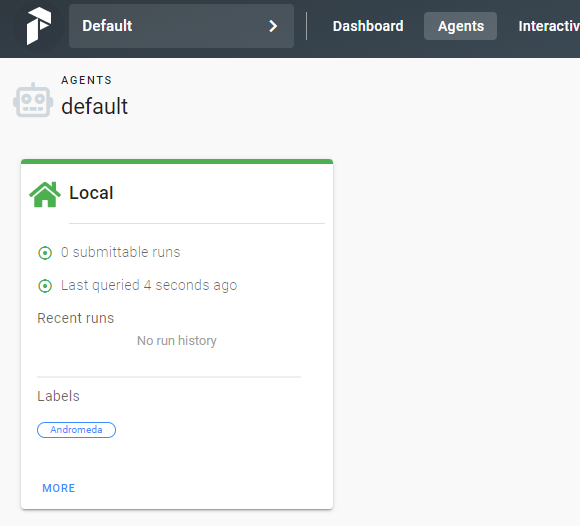

-> now you can run the flows per prefect UI  
-> click on flows, select your flow, click on run, see advanced configurations, scroll down and set run configuration to LOCAL      
-> and you can change your directory if you want (paths in main.py and config.yaml are ALWAYS based on root folder of framework (/{{ cookiecutter.repo_name }})

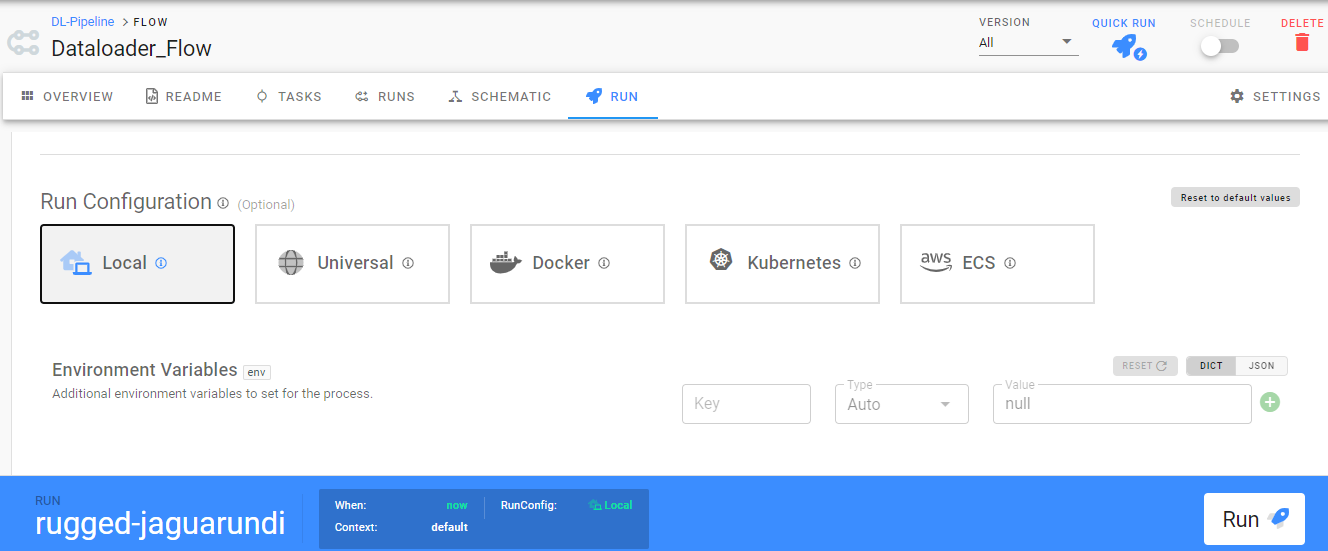

-> you can check on schematic the executed flows 

-> dataloader flow

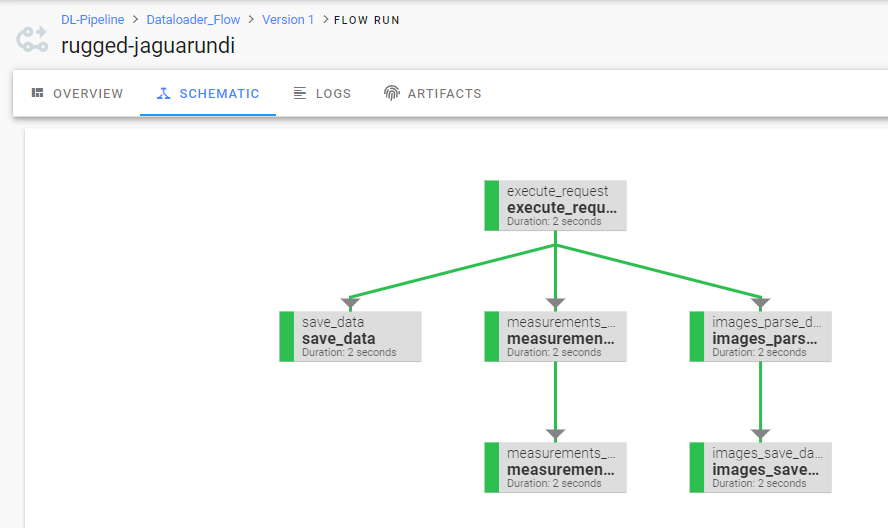

-> images flow

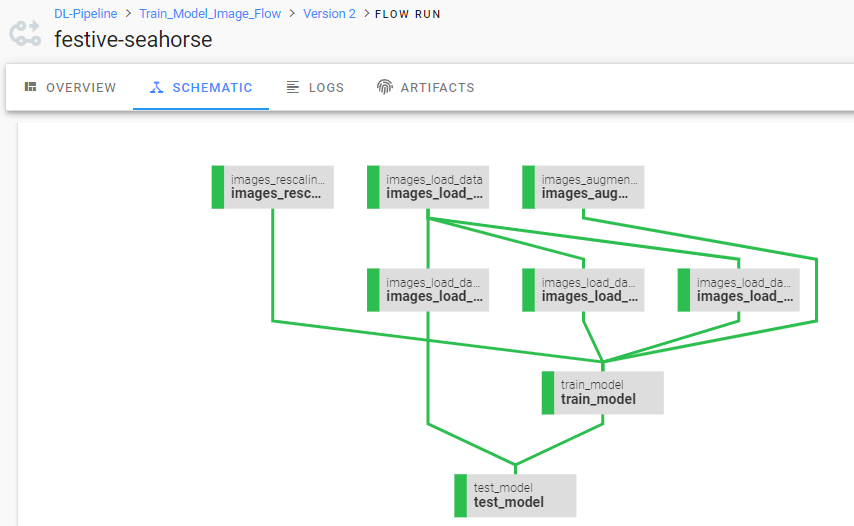

-> timeseries flow

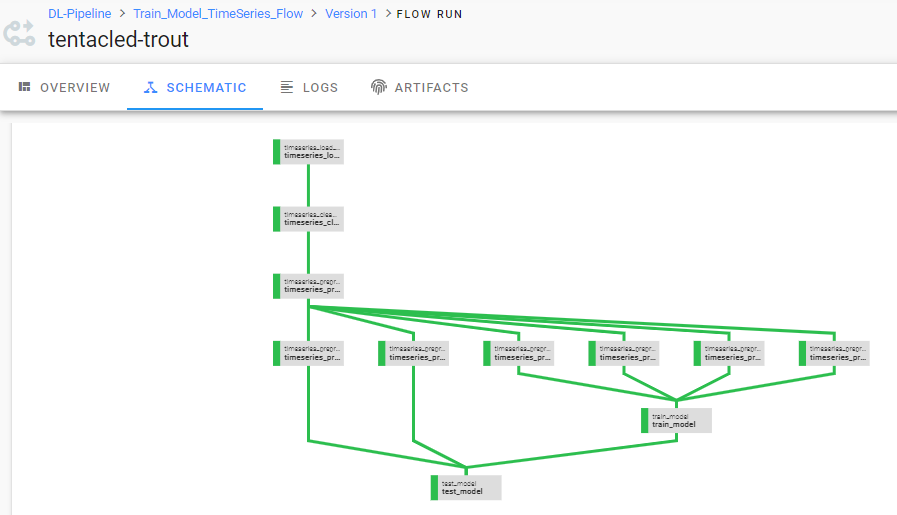

-> strucutreddata flow

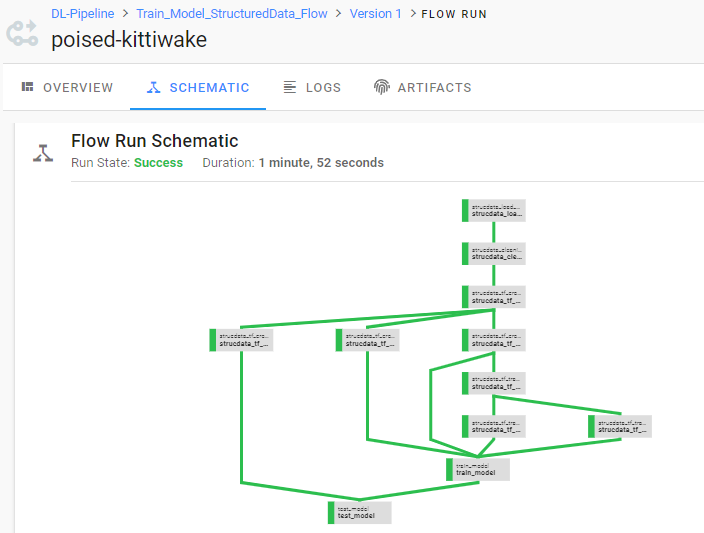

-> everything (should) work fine =)